## Obtaining values from a transect from a 1D and 1/4D output
This is an example script on how to obtain values of non-diaton phytoplankton concentration between a 1D and 1/4D MEDUSA outputs. 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import matplotlib
import glob
import numpy as np

# set default font size
matplotlib.rcParams.update({"font.size": 8})

Open MEDUSA outputs, they are both saved in different folders (OUT_eORCA1 for 1D and OUT_eORCA025 for 1/4D). We are going look at outputs from January 2020s and 2090s

In [2]:
path_com = '/gws/pw/j07/workshop/users/ayool/'
path_1D = path_com + 'eORCA1/'
fn1D= path_1D + 'eORCA1_MED_UKESM_y2020s_m01_ptrc_T.nc'

path_025D = path_com + 'eORCA025/'
fn025D = path_025D + 'eORCA025_MED_UKESM_y2020s_m01_ptrc_T.nc'

ds25= xr.open_dataset(fn025D)
ds1 = xr.open_dataset(fn1D)


In [3]:
din25= ds25.DIN
din25= din25.where(din25 > 1e-25)

din1= ds1.DIN
din1= din1.where(din1 > 1e-25)

Now we look at the output as is, and draw a transect line in the Atlantic - in pixel coordnates (not lat and lon). This spans approximately between latitude -18 to 48.

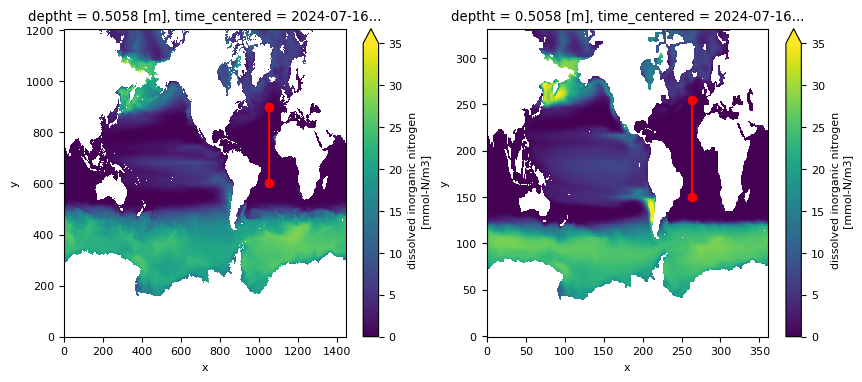

In [4]:
din25surf= din25.isel(deptht=0)
din1surf = din1.isel(deptht=0)

fig, axs = plt.subplots(1, 2, figsize=(10,4))
din25surf.plot(ax=axs[0], vmin=0, vmax=35)
x0, y0 = 1050, 600 # These are in _pixel_ coordinates!!
x1, y1 = 1050, 900
num = 100
x025d, y025d = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

axs[0].plot([x0, x1], [y0, y1], 'ro-')

din1surf.plot(ax=axs[1], vmin=0, vmax=35)
x0, y0 = 263,150 # These are in _pixel_ coordinates!!
x1, y1 = 263,255
num = 100
x1d, y1d = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
axs[1].plot([x0, x1], [y0, y1], 'ro-')

Now we look at the DIN concentration along the transect. Here we select the x coordinate (longitude), and the y coordinate (latitude), then plot it to see what is within the north-south transect and how they differ.

Text(0.5, 0, 'Latitude')

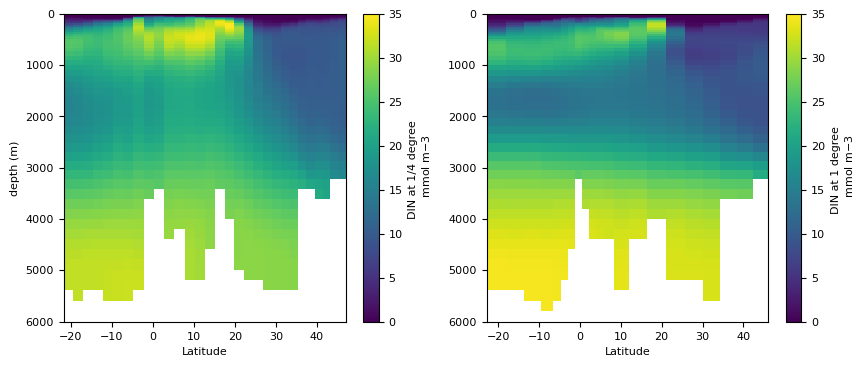

In [7]:
# Select x and y coordinate - I do this by trial, there should be a better way!

din25_lat= din25.isel(x=1050, y=np.arange(600,900,10)) 
din1_lat= din1.isel(x=263, y=np.arange(150,255,5))


f, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))                            
d1=din25_lat.plot(ax=ax1, y='deptht', x='nav_lat', vmin=0, vmax=35,add_labels=False, add_colorbar=False )
ax1.invert_yaxis()
cb= plt.colorbar(d1, ax=ax1)
cb.ax.set_ylabel('DIN at 1/4 degree \n mmol m${-3}$')
ax1.set_ylabel('depth (m)')
ax1.set_xlabel('Latitude')

d1=din1_lat.plot(y='deptht', x='nav_lat',  vmin=0, vmax=35,add_labels=False, add_colorbar=False)
cb= plt.colorbar(d1, ax=ax2)
cb.ax.set_ylabel('DIN at 1 degree \n mmol m${-3}$')
plt.gca().invert_yaxis()
ax2.set_xlabel('Latitude')